In [10]:
import numpy as np

In [11]:
import pandas as pd

In [12]:
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [14]:
data = pd.read_csv('diabetes.csv')

In [15]:
data.shape

(768, 9)

In [16]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
data.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [18]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

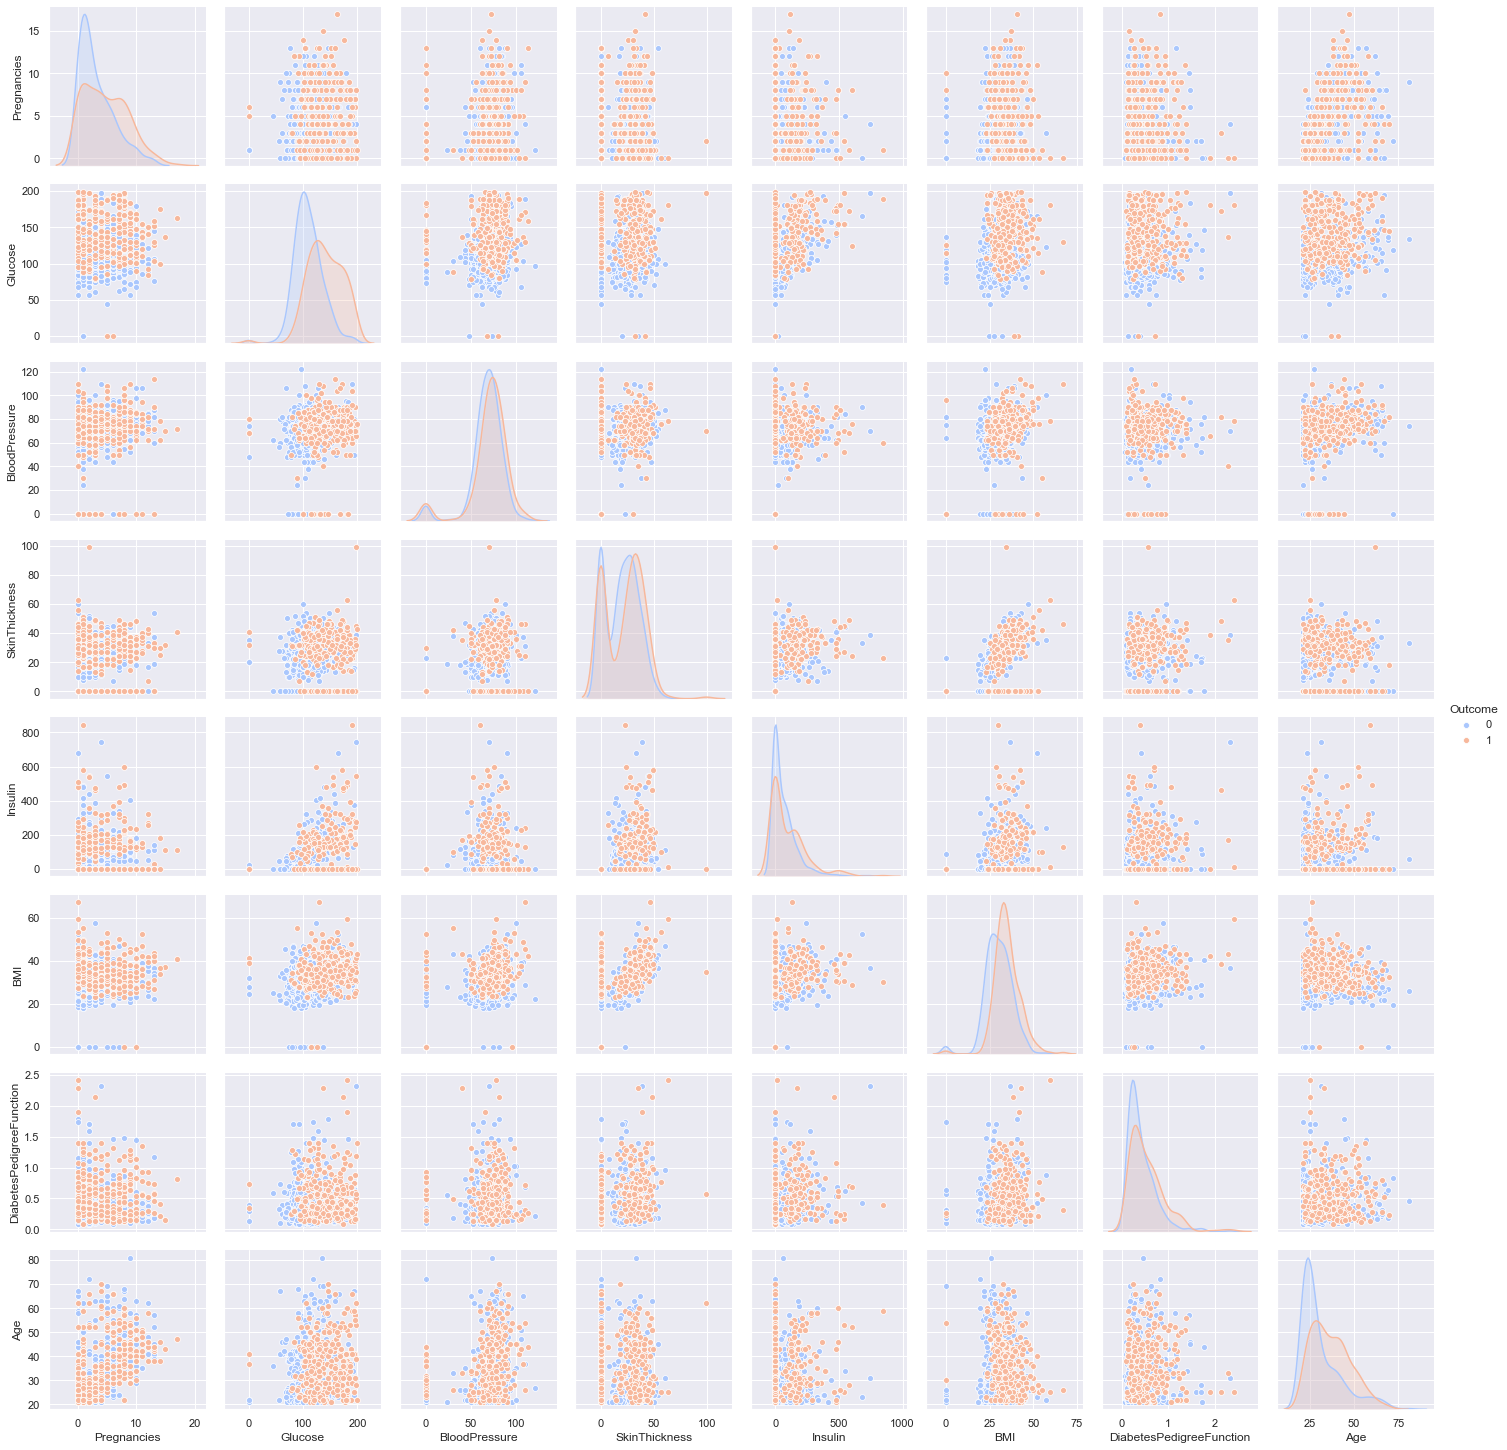

In [19]:
sns.pairplot(data, hue='Outcome',palette='coolwarm')
# understanding the distribution and dependacy of data based on the Outcome column

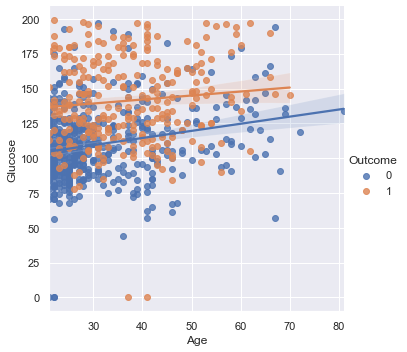

In [20]:
sns.lmplot(x='Age',y='Glucose',data=data,hue='Outcome')

In [21]:
print (data.isnull().values.any())

False


In [22]:
def plot_corr(data, size=11):
    corr = data.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

In [23]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


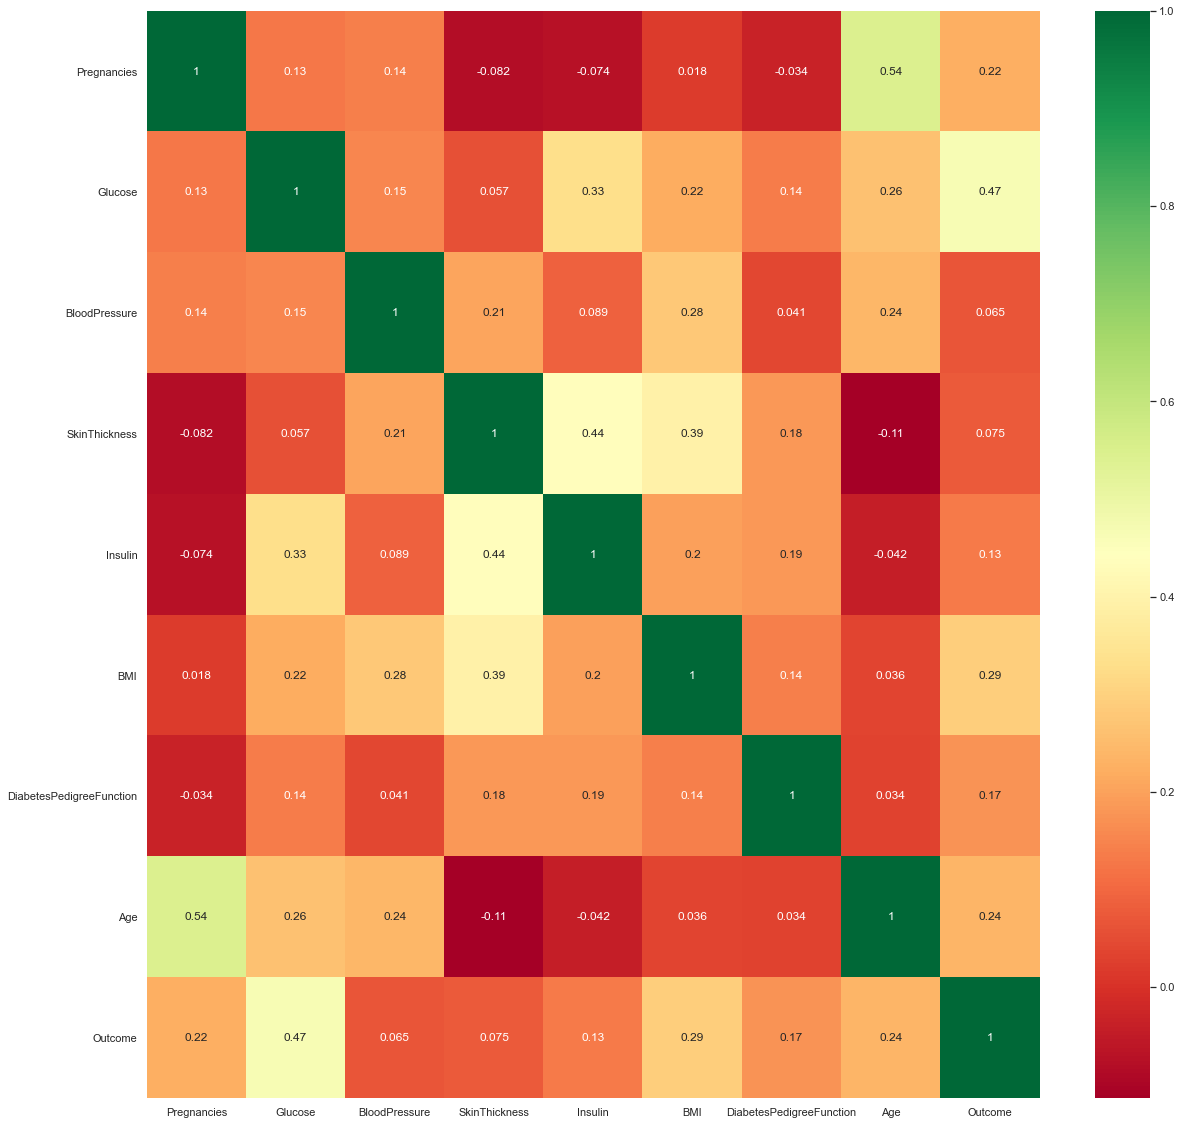

In [24]:
## Correlation
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [25]:
num_obs = len(data)
num_true = len(data.loc[data['Outcome'] == 1])
num_false = len(data.loc[data['Outcome'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


In [26]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Glucose', 'Age', 'BloodPressure', 'Insulin','BMI','SkinThickness' ,'Pregnancies',  'DiabetesPedigreeFunction']
predicted_class_names = ['Outcome']

X = data[feature_col_names].values     # predictor feature columns (8 X m)
y = data[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything


In [27]:
trainval = (1.0 * len(X_train)) / (1.0 * len(data.index))
testval = (1.0 * len(X_test)) / (1.0 * len(data.index))
print("{0:0.2f}% in training set".format(trainval * 100))
print("{0:0.2f}% in test set".format(testval * 100))

69.92% in training set
30.08% in test set


In [28]:
print("Original True  : {0} ({1:0.2f}%)".format(len(data.loc[data['Outcome'] == 1]), (len(data.loc[data['Outcome'] == 1])/len(data.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data.loc[data['Outcome'] == 0]), (len(data.loc[data['Outcome'] == 0])/len(data.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


In [29]:
print("# rows in data {0}".format(len(data)))
print("# rows missing glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("# rows missing thickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("# rows missing insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(data.loc[data['BMI'] == 0])))
print("# rows missing diab_pred: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("# rows missing age: {0}".format(len(data.loc[data['Age'] == 0])))

# rows in data 768
# rows missing glucose: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


In [30]:
from sklearn.impute import SimpleImputer

#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [31]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())


GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
prediction_from_trained_data = nb_model.predict(X_train)

In [33]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of trained naive bayes model is : {0:.4f}".format(accuracy))

Accuracy of trained naive bayes model is : 0.7542


In [34]:
# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)

print ("Accuracy of tested naive bayes model is: {0:0.4f}".format(accuracy))
print ("Confusion Matrix")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))
print ("Classification Report")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))

Accuracy of tested naive bayes model is: 0.7359
Confusion Matrix
[[ 52  28]
 [ 33 118]]
Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [35]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [41]:
rf_predict_test = rf_model.predict(X_test)

#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)

#print accuracy
print ("Accuracy of tested RandomForest: {0:.4f}".format(rf_accuracy_testdata))
import plot as plot

print ("Confusion Matrix for Random Forest")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Accuracy of tested RandomForest: 0.7576
Confusion Matrix for Random Forest
[[ 53  27]
 [ 29 122]]

Classification Report

              precision    recall  f1-score   support

           1       0.65      0.66      0.65        80
           0       0.82      0.81      0.81       151

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.76      0.76       231



In [42]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=1.0, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print ("Accuracy of trained LR : {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

Accuracy of trained LR : 0.7446


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [43]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  

# set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

lr_cv_predict_test = lr_cv_model.predict(X_test)

# testing metrics
print( "Accuracy of tested logisticRegressionCV: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print (metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1, 0])) 
print ("")
print ("Classification Report")
print (metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy of tested logisticRegressionCV: 0.7143
[[ 55  25]
 [ 41 110]]

Classification Report
              precision    recall  f1-score   support

           1       0.57      0.69      0.62        80
           0       0.81      0.73      0.77       151

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.70       231
weighted avg       0.73      0.71      0.72       231



In [44]:
from sklearn.svm import SVC
# Create a SupportVectorClassifier object
svm_model = SVC(kernel='linear', C=1, random_state=42)

svm_model.fit(X_train, y_train.ravel())

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [45]:
prediction_from_trained_data = svm_model.predict(X_train)

In [46]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of trained SVM model is : {0:.4f}".format(accuracy))

Accuracy of trained SVM model is : 0.7840


In [47]:
svm_predict_test = svm_model.predict(X_test)

#get accuracy
svm_accuracy_testdata = metrics.accuracy_score(y_test, svm_predict_test)

#print accuracy
print ("Accuracy of tested SVM: {0:.4f}".format(svm_accuracy_testdata))
import plot as plot

print ("Confusion Matrix for Support Vector Machine")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, svm_predict_test, labels=[1, 0])))
print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, svm_predict_test, labels=[1, 0])))

Accuracy of tested SVM: 0.7359
Confusion Matrix for Support Vector Machine
[[ 46  34]
 [ 27 124]]

Classification Report

              precision    recall  f1-score   support

           1       0.63      0.57      0.60        80
           0       0.78      0.82      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



In [48]:
from sklearn.neural_network import MLPClassifier
# Create a ArtificialNeuralNetworkClassifier object
ann_model = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500, random_state=42)

ann_model.fit(X_train, y_train.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [49]:
prediction_from_trained_data = ann_model.predict(X_train)

In [50]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of trained ANN model is : {0:.4f}".format(accuracy))

Accuracy of trained ANN model is : 0.7561


In [51]:
ann_predict_test = ann_model.predict(X_test)

#get accuracy
ann_accuracy_testdata = metrics.accuracy_score(y_test, ann_predict_test)

#print accuracy
print ("Accuracy of tested ANN: {0:.4f}".format(ann_accuracy_testdata))
import plot as plot

print ("Confusion Matrix for Artificial Neural Network")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, ann_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, ann_predict_test, labels=[ 1,0])))

Accuracy of tested ANN: 0.7143
Confusion Matrix for Artificial Neural Network
[[ 34  46]
 [ 20 131]]

Classification Report

              precision    recall  f1-score   support

           1       0.63      0.42      0.51        80
           0       0.74      0.87      0.80       151

    accuracy                           0.71       231
   macro avg       0.68      0.65      0.65       231
weighted avg       0.70      0.71      0.70       231



In [52]:
from sklearn.tree import DecisionTreeClassifier

# create DecisionTreeClassifier object
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [53]:
prediction_from_trained_data = dt_model.predict(X_train)

In [54]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of trained DT model is : {0:.4f}".format(accuracy))

Accuracy of trained DT model is : 1.0000


In [55]:
dt_predict_test = dt_model.predict(X_test)

#get accuracy
dt_accuracy_testdata = metrics.accuracy_score(y_test, dt_predict_test)

#print accuracy
print ("Accuracy of tested DT model is: {0:.4f}".format(dt_accuracy_testdata))
import plot as plot

print ("Confusion Matrix for DT")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, dt_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, dt_predict_test, labels=[ 1,0])))

Accuracy of tested DT model is: 0.6970
Confusion Matrix for DT
[[ 52  28]
 [ 42 109]]

Classification Report

              precision    recall  f1-score   support

           1       0.55      0.65      0.60        80
           0       0.80      0.72      0.76       151

    accuracy                           0.70       231
   macro avg       0.67      0.69      0.68       231
weighted avg       0.71      0.70      0.70       231



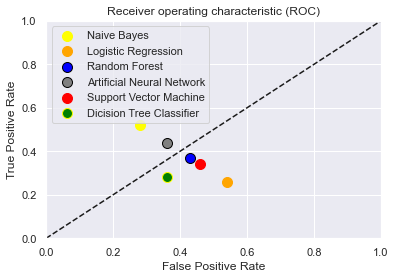

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# fpr, tpr
naive_bayes = np.array([0.28, 0.52])
logistic = np.array([0.54, 0.26])
random_forest = np.array([0.43, 0.37])
ann = np.array([0.36, 0.44])
svm = np.array([0.46, 0.34])
dt = np.array([0.52, 0.28])

#plotting
plt.scatter(naive_bayes[0], naive_bayes[1], label = 'Naive Bayes', facecolors='yellow', edgecolors='yellow', s=100)
plt.scatter(logistic[0], logistic[1], label = 'Logistic Regression', facecolors='orange', edgecolors='orange', s=100)
plt.scatter(random_forest[0], random_forest[1], label = 'Random Forest', facecolors='blue', edgecolors='black', s=100)
plt.scatter(ann[0], ann[1], label = 'Artificial Neural Network', facecolors='gray', edgecolors='black', s=100)
plt.scatter(svm[0], svm[1], label = 'Support Vector Machine', facecolors='red', edgecolors='red', s=100)
plt.scatter(ann[0], dt[1], label = 'Dicision Tree Classifier', facecolors='green', edgecolors='yellow', s=100)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc='upper left')

plt.show()

In [57]:
from sklearn import model_selection

In [58]:
from sklearn.preprocessing import MinMaxScaler as Scaler

In [59]:
scaler = Scaler()

In [60]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [61]:
train_set_scaled = scaler.transform(X_train)
test_set_scaled = scaler.transform(X_test)

In [62]:
dataset = pd.DataFrame(data=train_set_scaled)
dataset.head()

,0,1,2,3,4,5,6,7
0,0.329032,0.016667,0.367347,0.052885,0.116564,0.181818,0.000000,0.077711
1,0.393548,0.116667,0.489796,0.373798,0.382413,0.381818,0.250000,0.034586
2,0.587097,0.050000,0.448980,0.283654,0.492843,0.618182,0.208785,0.122545
3,0.561290,0.116667,0.448980,0.182692,0.304703,0.236364,0.187500,0.035013
4,0.380645,0.200000,0.061224,0.082933,0.513292,0.545455,0.000000,0.044833


In [63]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('ANN', MLPClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTC', DecisionTreeClassifier()))

In [64]:
seed = 6
results = []
names = []

In [65]:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternat

LR: 0.768233 (0.051906)


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37\lib\site-pack

ANN: 0.697830 (0.075556)
NB: 0.755178 (0.042766)


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: 

SVC: 0.760424 (0.052931)


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\hp\appdata\local\programs\python\python37\l

RFC: 0.777324 (0.059469)
DTC: 0.696497 (0.062658)


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


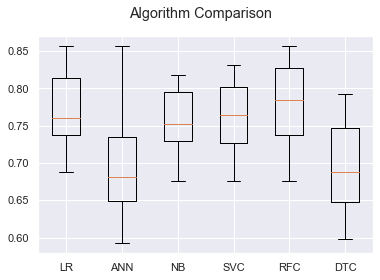

In [66]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

fname=input("Enter filename: ")
fpath=fname
f=open(fpath,'w+')
f.write("                                                 Pragya Anandita Kartik\n                                                      DMPA PROJECT\n                                                    All rights reserved\n\n                                                     ALGORITHM RESULTS\n\n")
f.close()

def write_results(body):
    body="\n"+body
    f=open(fpath,'a')
    f.write(body)
    f.close()
    
max_skinthickness = 80
data = data[data.SkinThickness!=80]

def replace_zero(df, field, target):
    mean_by_target = df.loc[df[field] != 0, [field, target]].groupby(target).mean()
    data.loc[(df[field] == 0)&(df[target] == 0), field] = mean_by_target.iloc[0][0]
    data.loc[(df[field] == 0)&(df[target] == 1), field] = mean_by_target.iloc[1][0]

    # run the function
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:   
    replace_zero(data, col, 'Outcome')
df=data.describe()
range_lookup={}
max_list,min_list=list(df.iloc[7]),list(df.iloc[3])
loc=0
for i in data.columns[:-1]:
    range_lookup[i] = [min_list[loc],max_list[loc]]
    loc+=1   
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.size)
print(y_test.size)



Enter filename: akaa
(537, 8)
(231, 8)
537
231


In [68]:
from sklearn.metrics import f1_score
# load algorithms
nb = GaussianNB()
#knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
lrc = LogisticRegressionCV(random_state=0)
lr = LogisticRegression(random_state=0)
ANN = MLPClassifier(random_state=0)
SVM = SVC(random_state=0)
algorithms = [nb, dtc, rfc, lrc, lr ,ANN, SVM]

train_score_dict=dict.fromkeys(algorithms,0)
test_score_dict=dict.fromkeys(algorithms,0)
avg_score_dict=dict.fromkeys(algorithms,0)

def train_clf(clf, X_train, y_train):
    
    return clf.fit(X_train, y_train)
    
def pred_clf(clf, features, target):
    
    y_pred = clf.predict(features)
    return f1_score(target.values, y_pred, pos_label = 1)


def get_prediction(clf, features):
    return "Diabetic" if clf.predict(features)==1 else "Non Diabetic"

def train_predict(clf, X_train, y_train, X_test, y_test):
    
    train_clf(clf, X_train, y_train)
    train_score_dict[clf]=round(pred_clf(clf, X_train, y_train),4)
    test_score_dict[clf]=round(pred_clf(clf, X_test, y_test),4)
    avg_score_dict[clf]=round((pred_clf(clf, X_train, y_train)+pred_clf(clf, X_test, y_test))/2,4)
    print("F1 score for training set is: {:.4f}".format(pred_clf(clf, X_train, y_train)))
    print("F1 score for testing set is: {:.4f}\n".format(pred_clf(clf, X_test, y_test)))
    write_results("\nF1 score for training set is: {:.4f}".format(pred_clf(clf, X_train, y_train)))
    write_results("\nF1 score for testing set is: {:.4f}\n".format(pred_clf(clf, X_test, y_test)))

for clf in algorithms:
    """
    print("\n{}: \n".format(clf.__class__.__name__))
    
    # create training data from first 100, then 200, then 300
    #for n in [179, 358, 537]:
        #train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)
    """        
    print("{}:".format(clf))
    write_results("\n"+str(clf))
    train_predict(clf, X_train, y_train, X_test, y_test)          ## will show F1 scores (harmonic mean of precision and recall) for all models

GaussianNB(priors=None, var_smoothing=1e-09):
F1 score for training set is: 0.7056
F1 score for testing set is: 0.6125

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'):
F1 score for training set is: 1.0000
F1 score for testing set is: 0.7421

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_we

In [69]:
res1="\nMaximum F1 score for training set: \n"+str(max(train_score_dict,key=train_score_dict.get))
res2="\nMaximum F1 score for testing set: \n"+str(max(test_score_dict,key=test_score_dict.get))
res3="\nMaximum avg of F1 score train,test: \n"+str(max(avg_score_dict,key=avg_score_dict.get))
res11="\nValue: "+str(max(train_score_dict.values()))+"\n"
res22="\nValue: "+str(max(test_score_dict.values()))+"\n"
res33="\nValue: "+str(max(avg_score_dict.values()))+"\n"
res0="Initial Algorithm fitting results"
res123=res0+res1+res11+res2+res22+res3+res33
print(res1)
print(res2)
print(res3)


Maximum F1 score for training set: 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Maximum F1 score for testing set: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,


In [70]:
write_results(res123)

In [71]:
best_algos=[max(train_score_dict,key=train_score_dict.get),max(test_score_dict,key=test_score_dict.get),max(avg_score_dict,key=avg_score_dict.get)]

In [72]:
best_algos

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=0, verbose=0,
                        warm_start=False),
 RandomForestCla

In [73]:
inp_dict=dict.fromkeys(data.columns)
del inp_dict['Outcome']
for i in data.columns[:-1]:
    inp_dict[i]=float(input("Enter value of "+i+", range-> "+str(range_lookup[i])+": "))

Enter value of Pregnancies, range-> [0.0, 17.0]: 1
Enter value of Glucose, range-> [44.0, 199.0]: 46
Enter value of BloodPressure, range-> [24.0, 122.0]: 45
Enter value of SkinThickness, range-> [7.0, 99.0]: 9
Enter value of Insulin, range-> [14.0, 846.0]: 760
Enter value of BMI, range-> [18.2, 67.1]: 65
Enter value of DiabetesPedigreeFunction, range-> [0.078, 2.42]: 2.1
Enter value of Age, range-> [21.0, 81.0]: 54


In [74]:
inp_features=np.array(list(inp_dict.values())).reshape(1,-1)
body="\nValues you wrote for: "+str(list(inp_dict))+" were \n"+str(inp_features)
write_results(body)
write_results("\nPredictions Made by Best selected algorithms\n")
for clf1 in best_algos:
    bdy=str(clf1)+"\npredicts: "+str(get_prediction(clf1,inp_features))+"\n\n"
    write_results(bdy)
    print(bdy)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
predicts: Diabetic


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
predicts: D

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
def heldout_score(clf, X_test_cv, y_test_cv):
    score = np.zeros((n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_decision_function(X_test_cv)):   #computes decision function for each stage
        score[i] = clf.loss_(y_test_cv, y_pred)
    return score

def cv_estimate(n_splits=10):
    cv = KFold(n_splits=n_splits)
    cv_clf = clf
    val_scores = np.zeros((n_estimators,), dtype=np.float64)
    for train, test in cv.split(X_train_cv):
        cv_clf.fit(X_train_cv.iloc[train], y_train_cv[train])
        val_scores += heldout_score(cv_clf, X_train_cv.iloc[test], y_train_cv[test])     #taking average of 10 model fits using crossvalidation
    val_scores /= n_splits
    return val_scores

In [77]:
print("\n\nPlease Check file: "+fname+" for generated results. Thank you!")



Please Check file: akaa for generated results. Thank you!
